## **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [3]:
df=pd.read_csv("hati.csv")

## Pemeriksaan Data

In [5]:
df.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,32,72,34,1,4,1,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,26,56,34,0,3,1,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,19,70,34,0,4,1,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,20,62,19,1,3,1,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,23,68,27,0,3,1,0,0,0,0


In [48]:
df = df.drop(['id','age'], axis=1)

KeyError: "['id', 'age'] not found in axis"

In [6]:
df.sample()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
208,80.0,1.02,0.0,0.0,1,1,0,0,341.0,37.0,...,29,64,30,1,4,1,0,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              400 non-null    float64
 1   sg              400 non-null    float64
 2   al              400 non-null    float64
 3   su              400 non-null    float64
 4   rbc             400 non-null    int64  
 5   pc              400 non-null    int64  
 6   pcc             400 non-null    int64  
 7   ba              400 non-null    int64  
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  sod             400 non-null    float64
 12  pot             400 non-null    float64
 13  hemo            400 non-null    float64
 14  pcv             400 non-null    int64  
 15  wc              400 non-null    int64  
 16  rc              400 non-null    int64  
 17  htn             400 non-null    int

In [8]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype== 'float64':
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace = True)
    else:
      df[col].fillna(df[col].mode()[0], inplace = True)

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2096\175467809.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2096\175467809.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [9]:
numerical

['bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [10]:
catgcols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [9]:
df['classification'].value_counts()

classification
0    250
1    150
Name: count, dtype: int64

In [10]:
df['classification'] = df['classification'].replace(['ckd\t'],'ckd')

In [13]:
df['classification'].value_counts()

classification
0    250
1    150
Name: count, dtype: int64

In [11]:
ind_col = [col for col in df.columns if col not in ['classification']]
deep_col = 'classification'

In [15]:
df[deep_col].value_counts()

classification
0    250
1    150
Name: count, dtype: int64

### Mengubah Data menjadi numeric

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [17]:
df['classification'] = le.fit_transform(df['classification'])

In [18]:
x = df[ind_col]
y = df[deep_col]

df.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,32,72,34,1,4,1,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,26,56,34,0,3,1,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,19,70,34,0,4,1,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,20,62,19,1,3,1,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,23,68,27,0,3,1,0,0,0,0


In [34]:
df.to_csv('hati.csv', index=False)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [400, 2]

### Membuat model DCT(Decission Tree)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Membuat model Decision Tree Classifier
model = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=4,
    max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best'
)

# Melatih model menggunakan data training
model = model.fit(x_train, y_train)

# Menghitung akurasi model
dtc_acc = accuracy_score(y_test, model.predict(x_test))

print(f"Akurasi Data Training = {accuracy_score(y_train, model.predict(x_train))}")
print(f"Akurasi Data Testing = {dtc_acc}")


NameError: name 'x_train' is not defined

### testing model

In [17]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Contoh data
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([0, 1, 1, 0])

# Membagi data menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree Classifier
model = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=4,
    max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best'
)

# Melatih model menggunakan data training
model.fit(x_train, y_train)

# Menghitung akurasi model
dtc_acc = accuracy_score(y_test, model.predict(x_test))
print(f"Akurasi Data Training = {accuracy_score(y_train, model.predict(x_train))}")
print(f"Akurasi Data Testing = {dtc_acc}")

# Input data baru untuk prediksi
input_data = [1, 0]

# Mengubah input data menjadi array numpy dan mereshape sesuai dengan kebutuhan model
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Membuat prediksi menggunakan model yang sudah dilatih
prediction = model.predict(input_data_reshaped)
print(prediction)

# Menampilkan hasil prediksi
if prediction[0] == 0:
    print("Pasien tidak terdeteksi penyakit hati")
else:
    print("Pasien terdeteksi penyakit hati")


Akurasi Data Training = 1.0
Akurasi Data Testing = 1.0
[1]
Pasien terdeteksi penyakit hati


In [43]:
# Input data baru untuk prediksi
# Modifikasi data untuk mendapatkan prediksi 0
input_data = (30, 0.950, 0, 0, 0, 0, 0, 0, 40, 20, 0, 110, 3.0, 10, 25, 60, 20, 0, 1, 0, 0, 0, 0)

# Mengubah input data menjadi array numpy dan mereshape sesuai dengan kebutuhan model
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Membuat prediksi menggunakan model yang sudah dilatih
prediction = model.predict(input_data_reshaped)
print(prediction)

# Menampilkan hasil prediksi
if prediction[0] == 0:
    print('Pasien tidak terdeteksi penyakit hati')
else:
    print('Pasien terdeteksi penyakit hati')


[1]
Pasien terdeteksi penyakit hati


### Keputusan

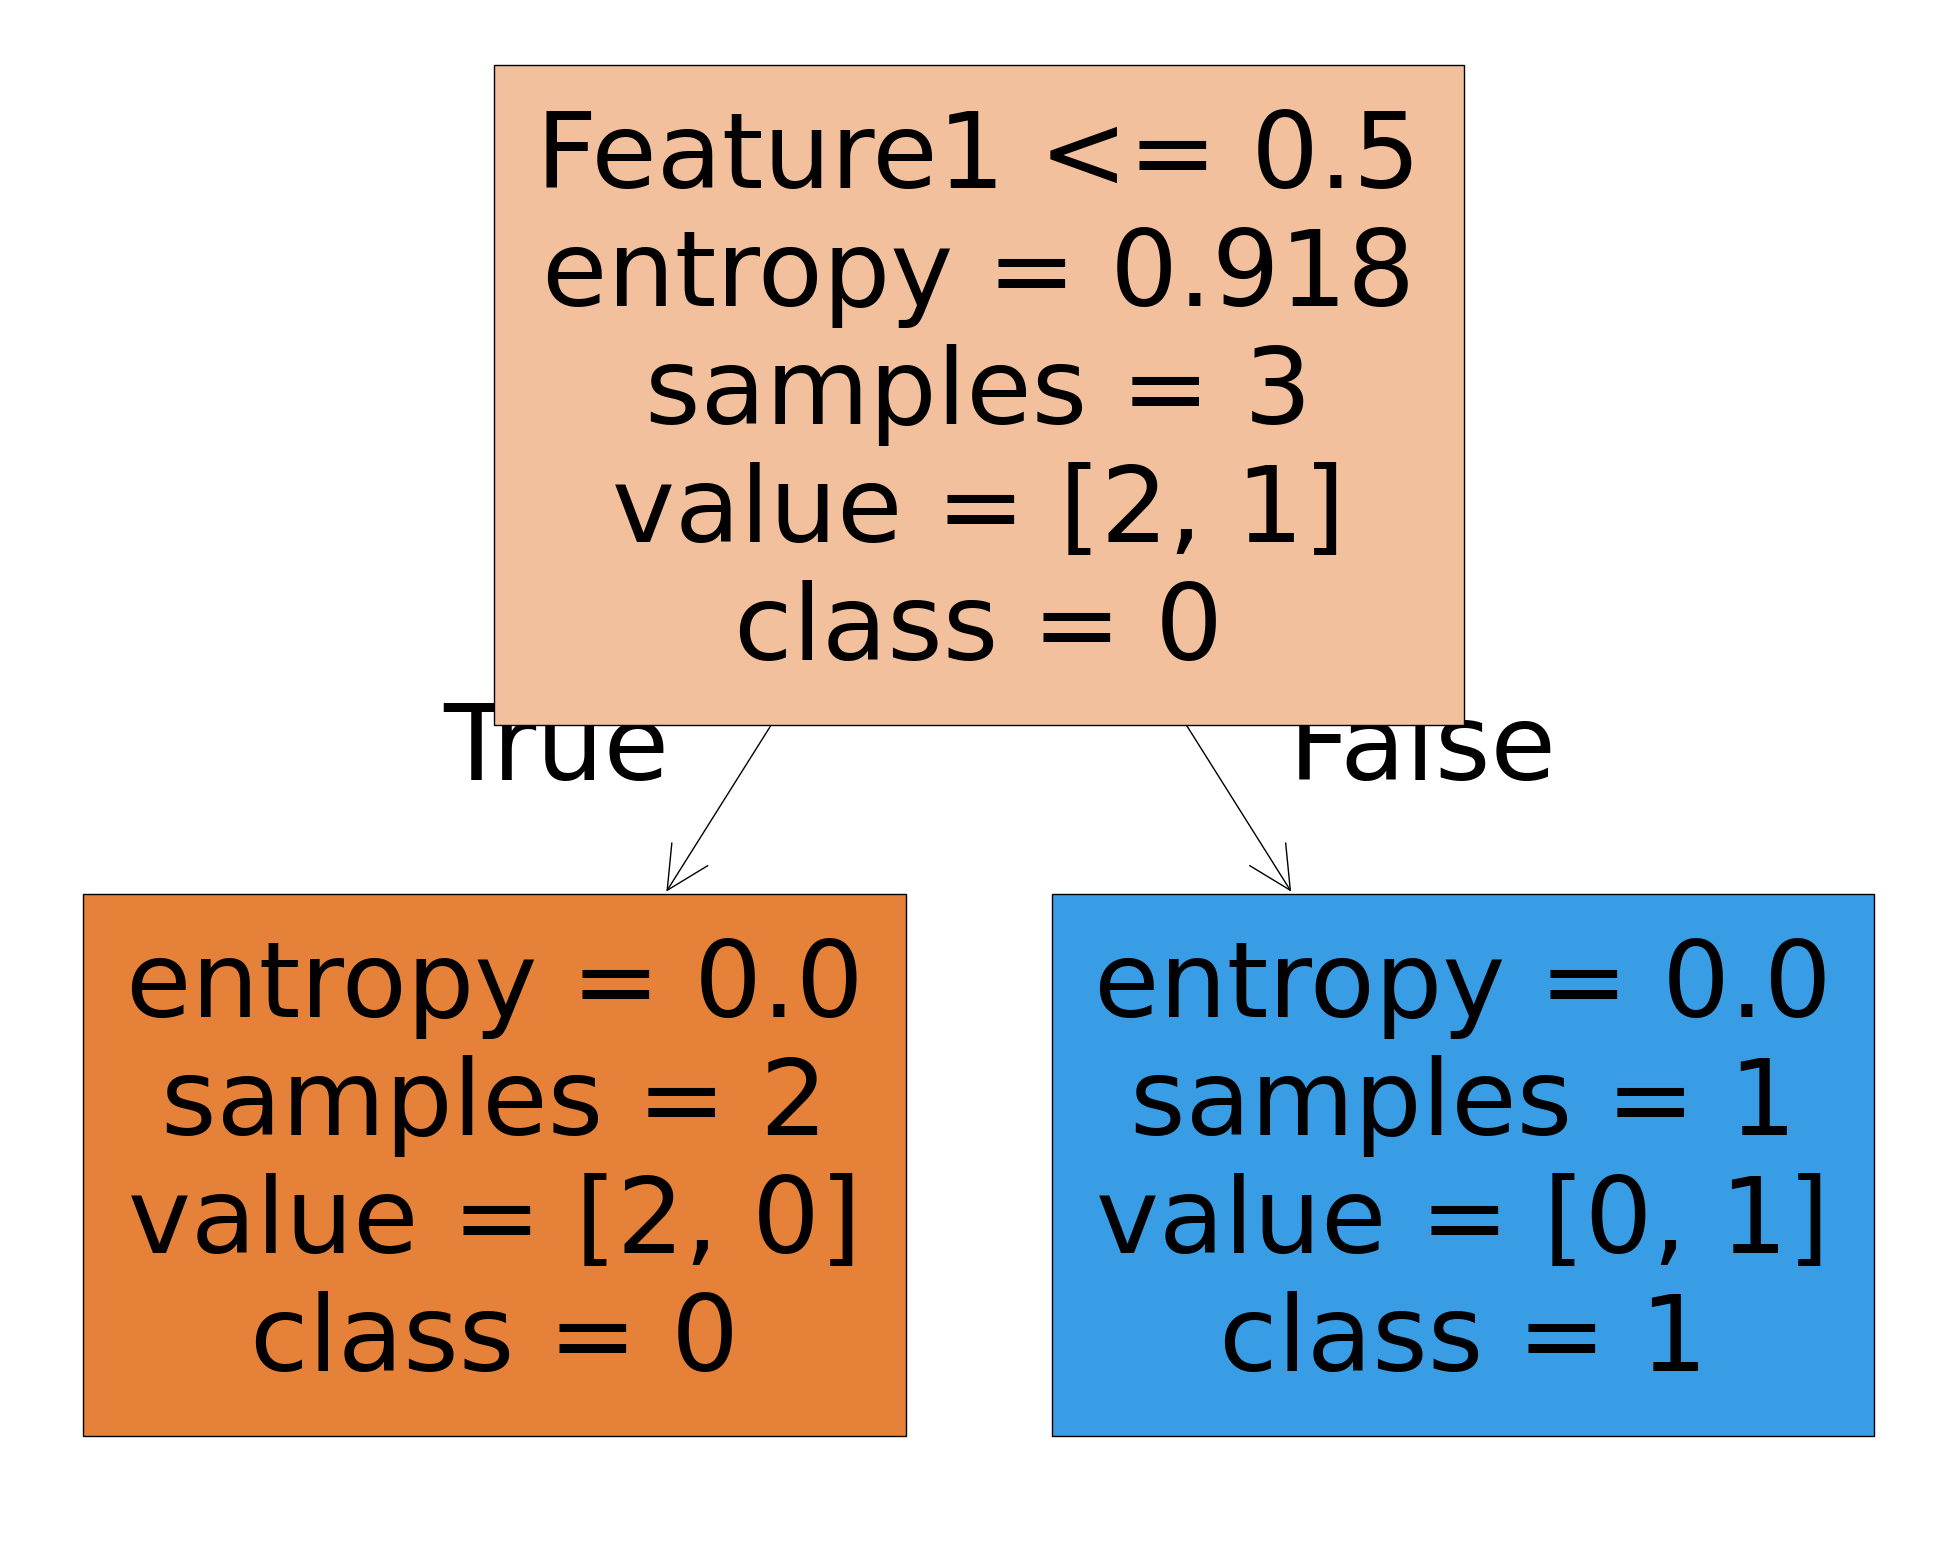

In [19]:
import matplotlib.pyplot as plt
from sklearn import tree

# Definisikan nama-nama fitur jika belum didefinisikan
ind_col = ['Feature1', 'Feature2']  # Ganti dengan nama fitur sebenarnya

# Membuat figure untuk plot pohon keputusan
fig = plt.figure(figsize=(25, 20))

# Plot pohon keputusan
_ = tree.plot_tree(
    model,
    feature_names=ind_col,
    class_names=['0', '1'],
    filled=True
)

# Menampilkan plot
plt.show()
